<a href="https://colab.research.google.com/github/joseec99/minetjosecriollo/blob/master/Copia_de_B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 10.1MB/s 
     |████████████████████████████████| 174kB 13.6MB/s 
     |████████████████████████████████| 6.8MB 9.9MB/s 
     |████████████████████████████████| 14.2MB 21.7MB/s 
     |████████████████████████████████| 157.5MB 80kB/s 
     |████████████████████████████████| 276kB 60.1MB/s 
     |████████████████████████████████| 1.6MB 54.1MB/s 
     |████████████████████████████████| 245kB 54.8MB/s 
     |████████████████████████████████| 102kB 14.8MB/s 
     |████████████████████████████████| 65.8MB 135kB/s 
     |████████████████████████████████| 1.8MB 56.3MB/s 
     |████████████████████████████████| 1.1MB 41.9MB/s 
     |████████████████████████████████| 81kB 13.0MB/s 
     |████████████████████████████████| 337kB 26.8MB/s 
     |████████████████████████████████| 153kB 58.1MB/s 
     |████████████████████████████████| 163kB 60.6MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 604kB 36.2M

In [1]:
# loading dataset 
from pycaret.datasets import get_data 
data = get_data('diabetes') 
# initializing setup 
from pycaret.classification import *
clf1 = setup(data, target = 'Class variable') 
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 
# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]
# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]
# blend top 5 base models 
blender = blend_models(estimator_list = top5) 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.0,0.6842,0.8125,0.7429,0.6209,0.6259
1,0.7778,0.0,0.7368,0.6667,0.7000,0.5242,0.5259
2,0.8148,0.0,0.5789,0.8462,0.6875,0.5624,0.5828
3,0.7037,0.0,0.5000,0.6250,0.5556,0.3374,0.3421
4,0.7778,0.0,0.7500,0.6818,0.7143,0.5331,0.5348
5,0.7593,0.0,0.6000,0.7059,0.6486,0.4674,0.4709
6,0.7593,0.0,0.5500,0.7333,0.6286,0.4558,0.4661
7,0.7358,0.0,0.6842,0.6190,0.6500,0.4387,0.4401
8,0.7358,0.0,0.5263,0.6667,0.5882,0.3977,0.4037
9,0.7547,0.0,0.4737,0.7500,0.5806,0.4195,0.4417


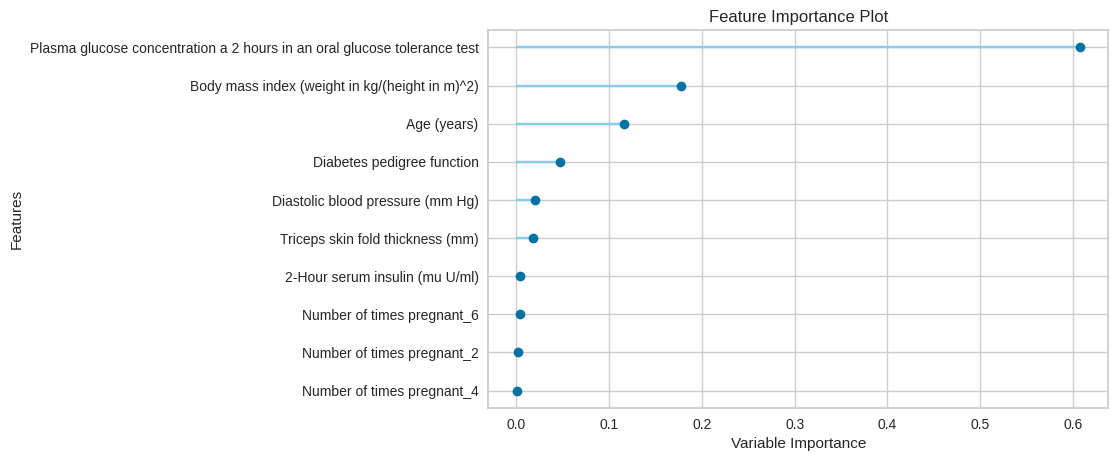

None


In [3]:
# select best model 
best = automl(optimize = 'Recall')
print(plot_model(best,plot='feature'))